In [2]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
plt.gray()

<Figure size 640x480 with 0 Axes>

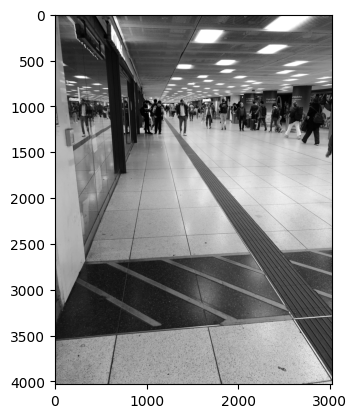

In [3]:
image_path = 'C:\\Users\\leonh\\Documents\\GitHub\\project_bums\\Test_Bilder\\MUC_BHF_1.jpg'
img = cv2.imread(image_path, 0)
plt.imshow(img)

In [27]:
gauss = cv2.GaussianBlur(img, None, 1)

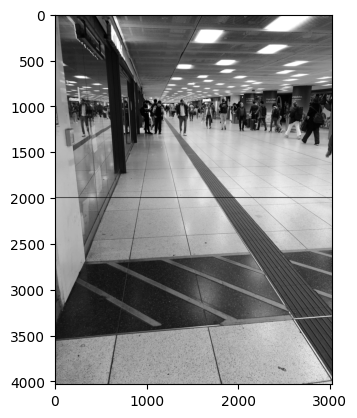

In [29]:
def create_horizontal_line(image, y_position, color=(0, 0, 255), thickness=5):
    line_image = np.array(image)
    cv2.line(line_image, (0, y_position), (image.shape[1], y_position), color, thickness)
    return line_image


y_position = 2000  # Y-Position der horizontalen Linie

line_image = create_horizontal_line(gauss, y_position)

plt.imshow (line_image)


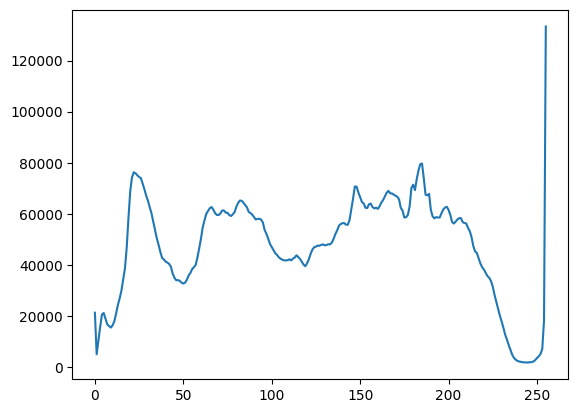

In [30]:
# Histogramm entlang der horizontalen Linie berechnen
histogram = cv2.calcHist([line_image], [0], None, [256], [0, 256])

# Histogramm-Plot erstellen
plt.plot(histogram)

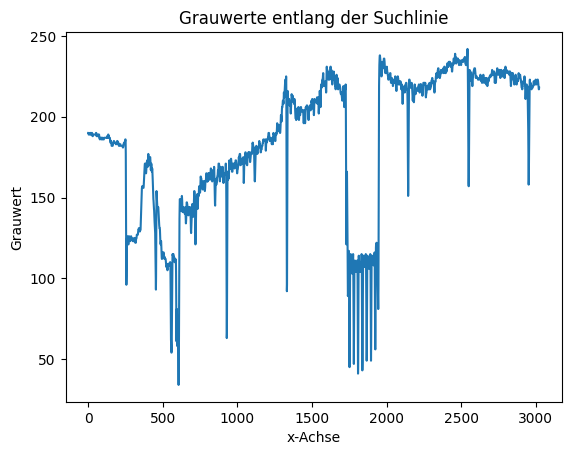

In [31]:
def grayscale_values(image, y_position):
    # Linienbild erstellen
    line_image = create_horizontal_line(image, y_position)

    # x-Achse und Grauwerte initialisieren
    x_values = np.arange(image.shape[1])
    gray_values = []

    # Grauwerte entlang der Linie sammeln
    for x in x_values:
        gray_values.append(image[y_position, x])

    return gray_values, x_values


# Plot erstellen
def plot_values (gray_values, x_values):
    plt.plot(x_values, gray_values)
    plt.title('Grauwerte entlang der Suchlinie')
    plt.xlabel('x-Achse')
    plt.ylabel('Grauwert')
    plt.show()

gray_values, x_values = grayscale_values(gauss, y_position);
plot_values (gray_values, x_values)

In [36]:
def detect_gray_value_changes(image, y_position, threshold=50, max_distance=85, min_distance=25):
    # Linienbild erstellen
    line_image = create_horizontal_line(image, y_position)

    # x-Achse und Grauwerte initialisieren
    x_values = np.arange(image.shape[1])
    gray_values = []

    # Grauwerte entlang der Linie sammeln
    for x in x_values:
        gray_values.append(image[y_position, x])

    # Grauwertänderungen und zugehörige x-Positionen sammeln
    gray_changes = []
    change_positions = []
    prev_value = gray_values[0]
    prev_position_wright = 0
    prev_position = 0

    for i in range(1, len(gray_values)):
        current_value = gray_values[i]
        if abs(current_value - prev_value) > threshold:
            #prev_position = i
            #if i-all_prev_position > min_distance:
            if min_distance < (i - prev_position) < max_distance:
                gray_changes.append(current_value - prev_value)
                change_positions.append(i)
                prev_value = current_value
                prev_position = i
                prev_position_wright = i
            else : 
                prev_position = i

    return gray_changes, change_positions


gray_changes, change_positions = detect_gray_value_changes(img, y_position)

print("Grauwertänderungen: ", gray_changes)
print("Positionen der Änderungen: ", change_positions)


Grauwertänderungen:  [213]
Positionen der Änderungen:  [1330]


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6048\861052485.py:22: RuntimeWarning: overflow encountered in scalar subtract
  if abs(current_value - prev_value) > threshold:
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6048\861052485.py:26: RuntimeWarning: overflow encountered in scalar subtract
  gray_changes.append(current_value - prev_value)


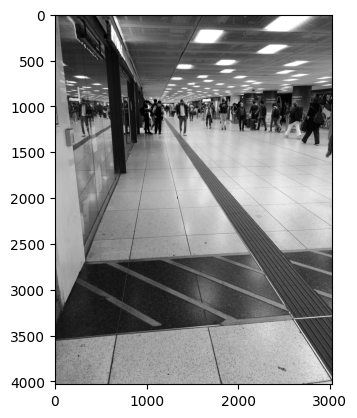

In [37]:
def draw_gray_value_changes(image, y_position, change_positions, color=(0, 255, 0), thickness=5):
    drawn_image = np.copy(image)

    for position in change_positions:
        cv2.line(drawn_image, (position, y_position - 10), (position, y_position + 10), color, thickness)

    return drawn_image



image_with_changes = draw_gray_value_changes(img, y_position, change_positions)

plt.imshow(image_with_changes)
